In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("supermarket_sales.csv")

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of Goods sold,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [59]:
df['Invoice ID'].nunique()

1000

In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  Cost of Goods sold       1000 non-null   float64
 14  gross margin percentage  

In [55]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Cost of Goods sold,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [60]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'Cost of Goods sold', 'gross margin percentage',
       'gross income', 'Rating', 'Month', 'Day_of_Week', 'Season',
       'Spending_Category', 'Profit_Margin', 'Hour',
       'Average_Transaction_Value', 'Average_Profit_Per_Sale'],
      dtype='object')

In [7]:
df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

In [61]:
correlation_coefficient = df['Rating'].corr(df['Quantity'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

#very weak negative linear correlation 
#as the 'Rating' increases, the 'Quantity' tends to decrease, and vice versa.

Pearson Correlation Coefficient: -0.015814904627166927


In [62]:
# Example: Calculate KPIs
df['Average_Transaction_Value'] = df['Total'] / df['Quantity']
df['Average_Profit_Per_Sale'] = (df['Total'] - df['Cost of Goods sold']) / df['Quantity']

# Print KPIs
print("Average Transaction Value:", df['Average_Transaction_Value'].mean())
print("Average Profit Per Sale:", df['Average_Profit_Per_Sale'].mean())


Average Transaction Value: 58.45573649999999
Average Profit Per Sale: 2.7836065


In [63]:
df.groupby('Branch')['Cost of Goods sold'].mean()

Branch
A    297.480029
B    304.640482
C    321.047348
Name: Cost of Goods sold, dtype: float64

In [24]:
# Print all unique ratings - they are float points ranging from 4-10
unique_ratings = df['Rating'].unique()
print("Unique Ratings:", sorted(unique_ratings))

Unique Ratings: [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]


Text(0.5, 1.0, 'Distribution of Ratings')

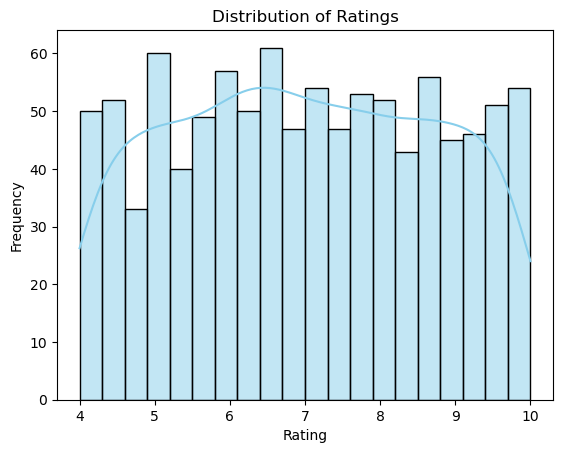

In [26]:
# Create a histogram using seaborn seeing as there is a large number of values, we can put these into Bins
sns.histplot(data=df, x='Rating', bins=20, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

Text(0.5, 1.0, 'Distribution of Payment Methods')

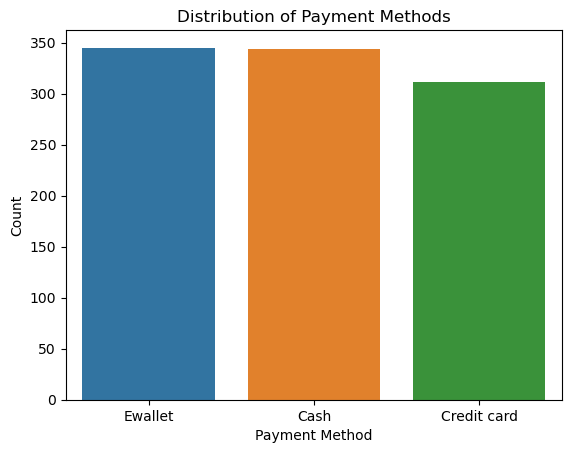

In [66]:
sns.countplot(data=df, x='Payment')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods')

Text(0.5, 1.0, 'Distribution of Payment Methods by Store')

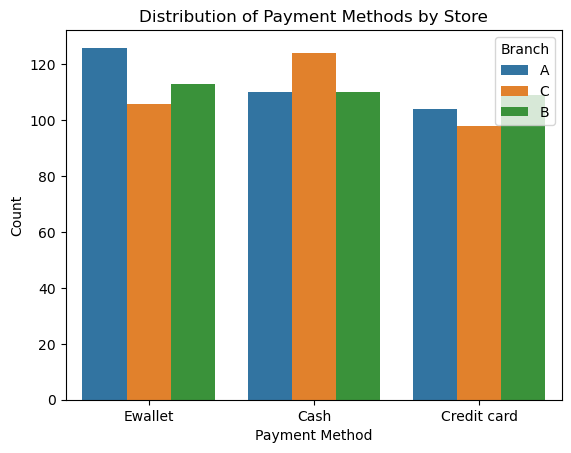

In [42]:
sns.countplot(data=df, x='Payment',hue='Branch')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods by Store')

C:\Users\geeso\AppData\Local\Temp\ipykernel_34236\2744718426.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product line', y='Total', ci=None)


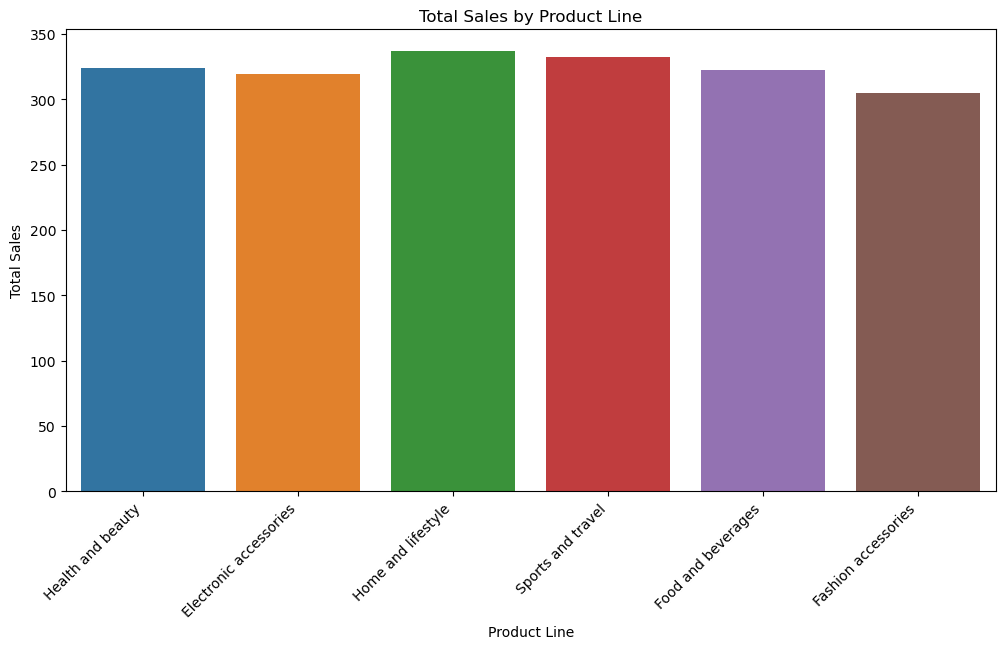

In [70]:
#Product Line Analysis:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product line', y='Total', ci=None)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\geeso\AppData\Local\Temp\ipykernel_34236\1453489496.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Customer type', y='Total', hue='Gender', ci=None)


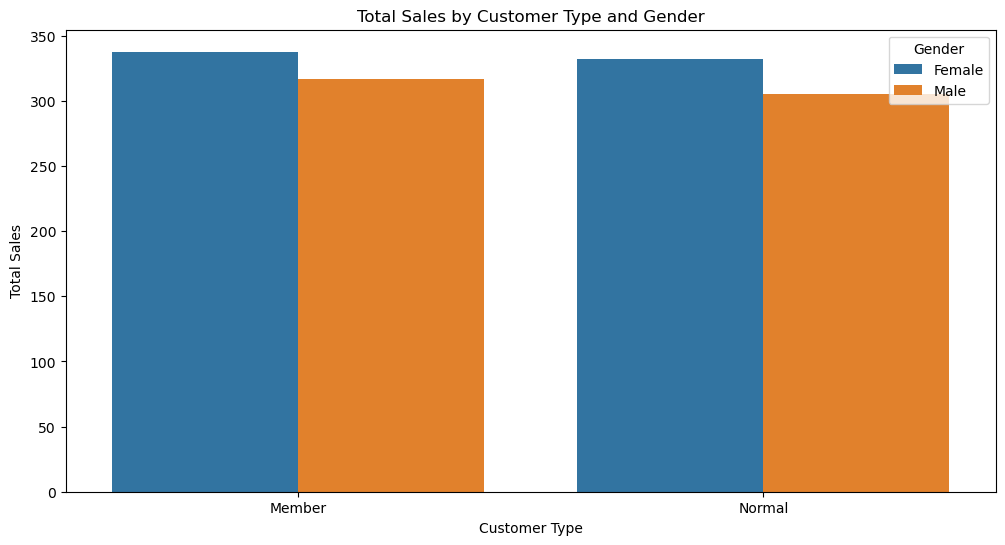

In [46]:
# Visualise total sales by customer type and gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Customer type', y='Total', hue='Gender', ci=None)
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Type and Gender')
plt.show()

Text(0.5, 1.0, 'Total Sales by Day of the Week')

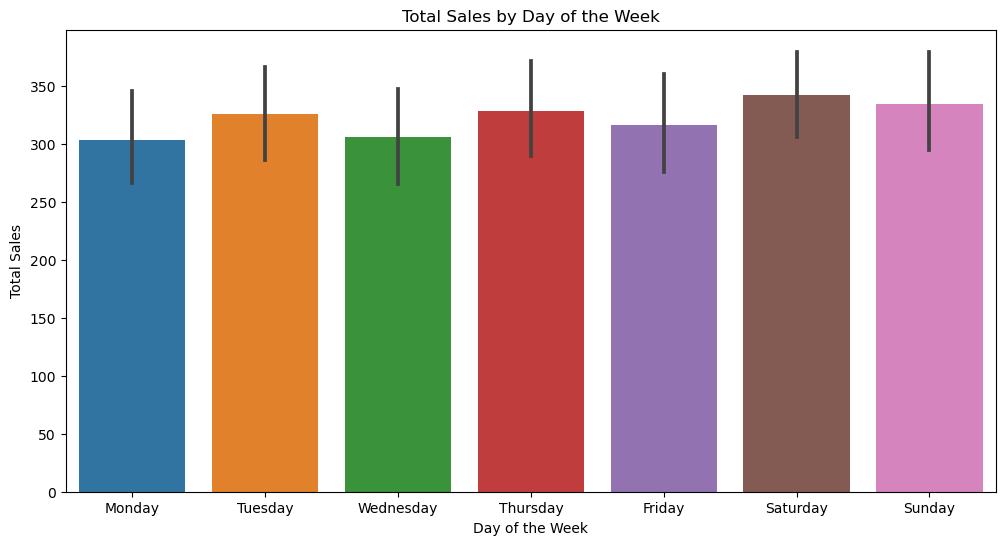

In [72]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()

# Visualise total sales by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Day_of_Week', y='Total', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day of the Week')


Text(0.5, 1.0, 'Customer Segmentation based on Total Spending')

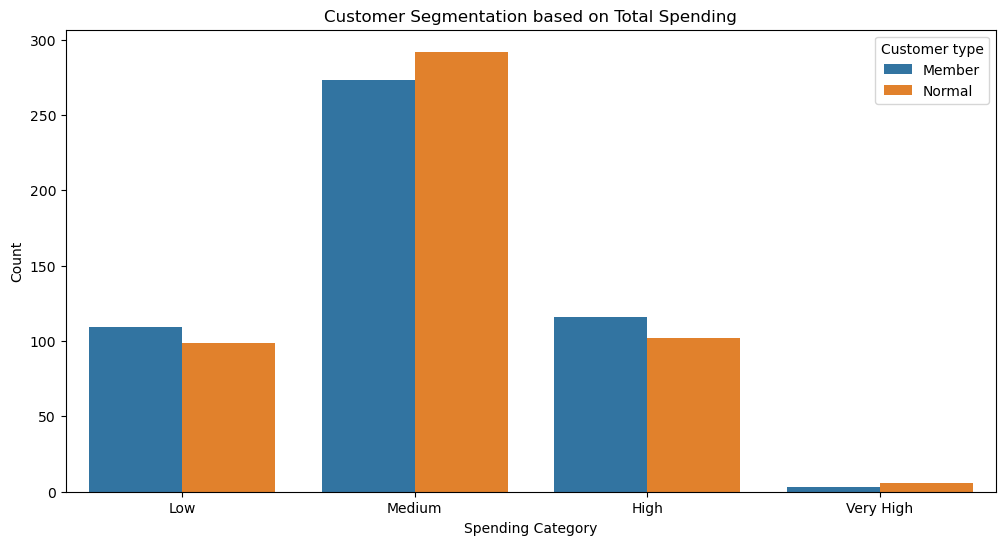

In [75]:
#Segmentation based on total spending
df['Spending_Category'] = pd.cut(df['Total'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Spending_Category', hue='Customer type')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.title('Customer Segmentation based on Total Spending')


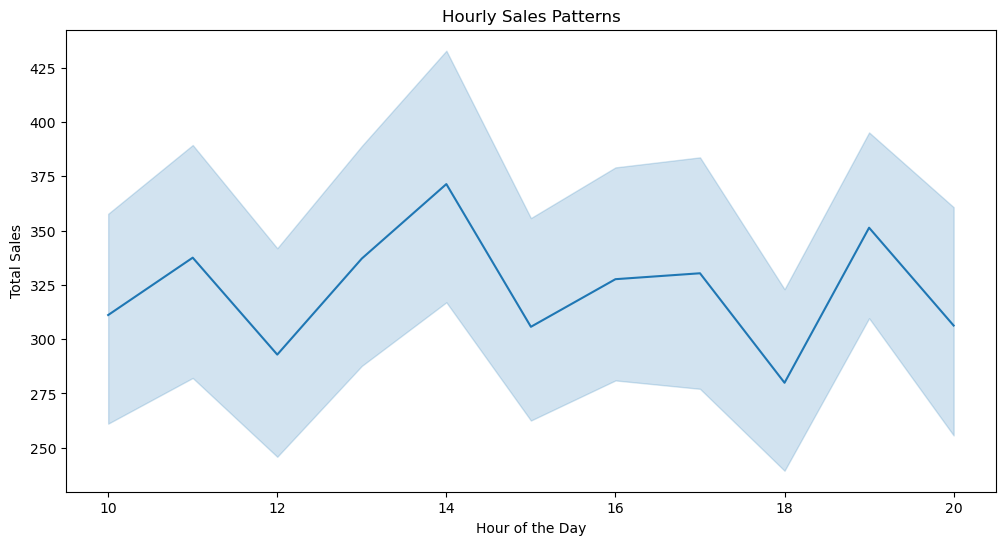

In [76]:
# Example: Hourly sales patterns
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Visualise hourly sales patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Total')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Hourly Sales Patterns')
plt.show()
